### 1. 데이터로딩

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
print("NumPy version: {}". format(np.__version__))
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print("pandas version: {}". format(pd.__version__))
import seaborn as sns

print("seaborn version: {}". format(sns.__version__))


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C:/Kaggle Korea/2019-1st-ml-month-with-kakr"))

# Any results you write to the current directory are saved as output.

NumPy version: 1.17.2
pandas version: 0.23.0
seaborn version: 0.8.1
['sample_submission.csv', 'submission.csv', 'test.csv', 'train.csv']


### 1. Titanic Data Set 불러오기  

####  - Data 탐구 (Exploration)  

In [2]:
import pandas as pd
train = pd.read_csv('C:/Kaggle Korea/2019-1st-ml-month-with-kakr/train.csv')
test = pd.read_csv('C:/Kaggle Korea/2019-1st-ml-month-with-kakr/test.csv')

In [3]:
print("train.csv. Shape: ",train.shape)
print("test.csv. Shape: ",test.shape)

train.csv. Shape:  (891, 12)
test.csv. Shape:  (418, 11)


- 891개의 row와 예측할 생존자(Survived)를 제외하고 11개의 columns를 가지고 있다.

In [4]:
# 필요 라이브러리  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

### 2. 데이터 분석

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- test 데이터는 418개의 자료로 결측값도 존재함

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age, Cabin, Embarked에 결측값이 존재함

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### - 예측하고자 하는 Survived의 비율 시각화 작업

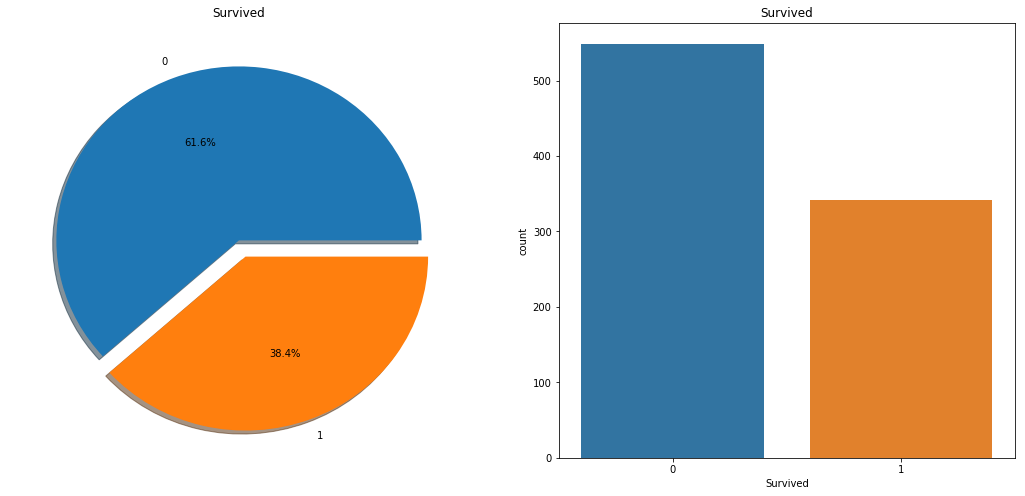

In [10]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#subplot으로 그래프를 1행 2열로 2개 생성한다.
f, ax=plt.subplots(1, 2, figsize=(18,8))

#생존한 사람과 사망한 사람의 비율을 원그래프로 보여준다.
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

#생존한 사람과 사망한 사람을 count하여 막대그래프로 보여준다.
sns.countplot('Survived',data=train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- 약 61.6%가 사망하였고, 약 38.4%가 생존하였다.  

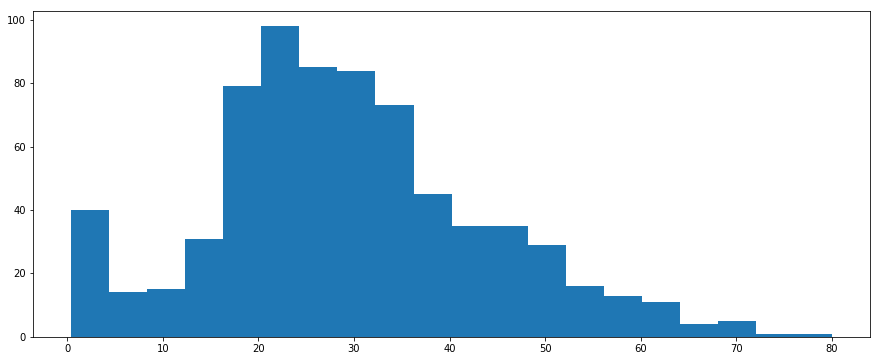

In [11]:
train['Age'].hist(bins=20, figsize= (15, 6), grid=False)

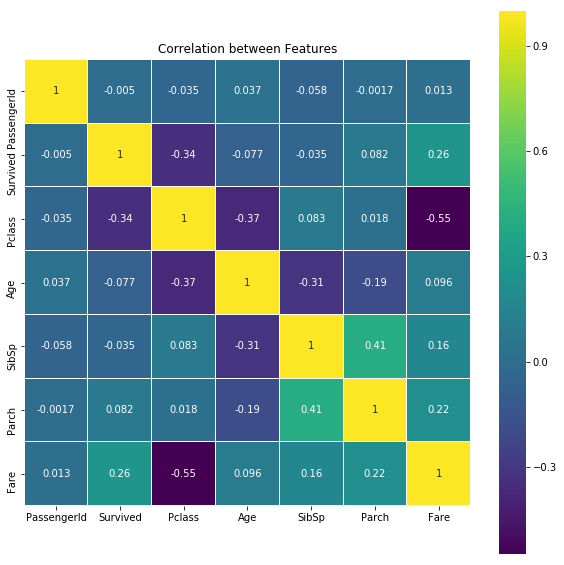

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), linewidths=0.01, square= True,
           annot = True, cmap= plt.cm.viridis, linecolor = 'white')
plt.title('Correlation between Features')
plt.show()

### 2. Preprocessing  
#### 2.1 객실등급 (Pclass)  

In [13]:
# 모델링한 데이터들을 Feature Engineering을 하게 되면, 
# test데이터도 똑같이 수정해야하기 때문에 편리성을 위해 실행시킨다.
# 원본의 데이터를 건드는 것이기 때문에, train_test_data를 수정하면 원본의 데이터돋도 같이 수정된다.
train_test_data = [train, test]

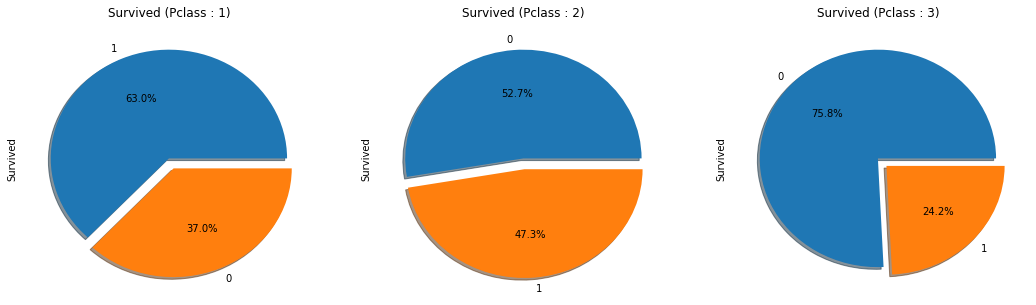

In [14]:
f,ax=plt.subplots(1,3,figsize=(18,5))
#각 성별에 따라서 Survived 비율을 그래프로 나타낸다.
train['Survived'][train['Pclass']==1].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
train['Survived'][train['Pclass']==2].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
train['Survived'][train['Pclass']==3].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Survived (Pclass : 1)')
ax[1].set_title('Survived (Pclass : 2)')
ax[2].set_title('Survived (Pclass : 3)')
plt.show()



- Pclass가 1인 경우는 63%가 살았으나, 2와 3은 각각 52.7%, 75.8%가 죽었다.

In [15]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


#### 2.2 성별 (Sex)

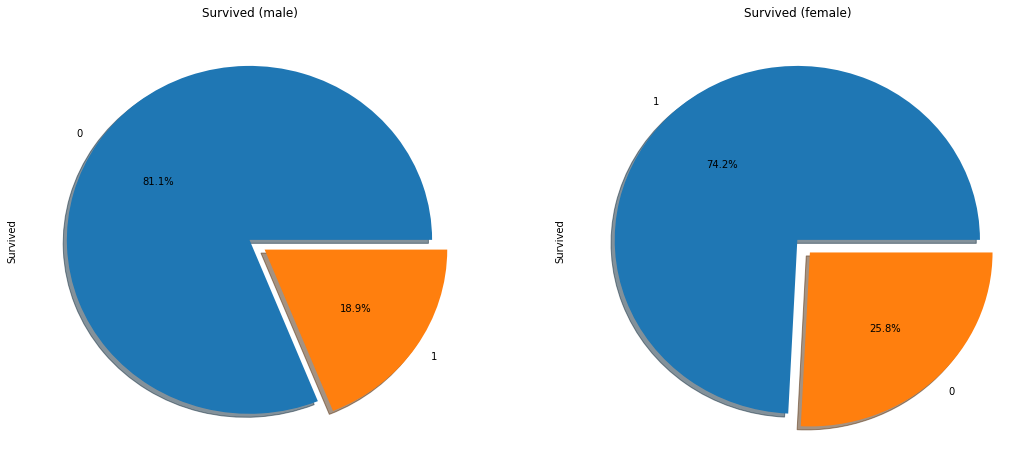

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
#각 성별에 따라서 Survived 비율을 그래프로 나타낸다.
train['Survived'][train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
train['Survived'][train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
plt.show()

- male의 Survived 비율은 약 81.1%가 사망하였고, 약 18.9%가 생존하였다.  
- female의 Survived 비율은 약 25.8%가 사망하였고, 약 74.2%가 생존하였다.   
- 남자는 약 81%가 사망하였고, 여자는 26%가 사망하였다.  
- 남자가 더 많이 사망한 것으로 보아 Lady - first가 시행되었을 것이다.  

In [17]:
from sklearn.preprocessing import LabelBinarizer
#먼저 양적변수로 바꿔 줄 함수 호출
encoder=LabelBinarizer()
#변환된 열을 생성하여 적용
train['Sex']=encoder.fit_transform(train['Sex'])
test['Sex']=encoder.fit_transform(test['Sex'])
train.head(10)
#이렇게 하면 male 즉, 남자가 1 여자가 0 이 된다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


#### 2.3 이름 (Name)

In [18]:
# 이름 전체를 해석하기 난해하기 때문에 사람에게 붙는 호칭으로 분석을 하고자 함.
for dataset in train_test_data:
    dataset['Name'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=True)

In [19]:
titles=train['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [20]:
titles_test=test['Name'].unique()
titles_test

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [21]:
# Mr부터 Rev까지는 어느 정도의 인원이 있으므로 다른 인원들은 비슷한 호칭으로 통일 시켜준다.
train['Name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Countess      1
Don           1
Mme           1
Capt          1
Sir           1
Jonkheer      1
Ms            1
Lady          1
Name: Name, dtype: int64

In [22]:
replace_name = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}

In [23]:
train.replace({'Name' : replace_name}, inplace=True)

In [24]:
test.replace({'Name' : replace_name}, inplace=True)

In [25]:
# 각 Name에 따라 생존확률에 따라 생존확률이 높을 수록 높은 점수를 매긴다.
train[['Name', 'Survived']].groupby(['Name'], as_index=False).mean()

,Name,Survived
0,Dr,0.428571
1,Master,0.575000
2,Miss,0.704301
3,Mr,0.160000
4,Mrs,0.795276
5,Rev,0.000000


In [26]:
# 사용 시 'Rev'인 경우 인식을 하지 못함. 꼭 ""(큰따음표) 로 감싸줄 것
score_name = {"Rev" : 0, "Mr" : 1, "Dr" : 2, "Master" : 3, "Miss" : 4, "Mrs" : 5}
for dataset in train_test_data:
    dataset['Name'] = dataset['Name'].map(score_name)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,5,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,4,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,5,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,1,1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,1,1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,3,1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,5,0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,5,0,14.0,1,0,237736,30.0708,NaN,C


#### 2.4 나이 (Age)

In [27]:
# 먼저 이름에 따라서 나이에 Null 값을 채워 준다.
titles = [0,1,2,3,4,5]
for title in titles:
    age_to_impute = train.groupby('Name')['Age'].median()[titles.index(title)]
    train.loc[(train['Age'].isnull()) & (train['Name'] == title), 'Age'] = age_to_impute
train['Age'].isnull().sum()

0

In [28]:
for title in titles:
    age_to_impute = train.groupby('Name')['Age'].median()[titles.index(title)]
    test.loc[(test['Age'].isnull()) & (test['Name'] == title), 'Age'] = age_to_impute
test['Age'].isnull().sum()

0

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


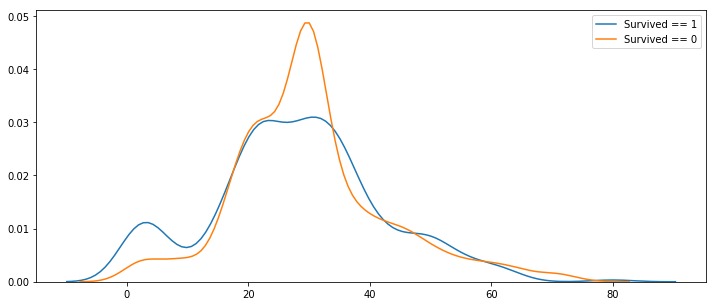

In [29]:
#나이와 생존에 관한 histogram

f, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.kdeplot(train[train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 나이에 따라서 20~30대 일수록 많이 생존하기도 했으며 또한 많이 죽기도 했다.  
- 나이가 어릴수록 생존확률이 높다.  

In [30]:
# 나이 구간을 나누어 준다.
for dataset in train_test_data:
    dataset['Age_bin'] = pd.cut(train['Age'], 5)

In [31]:
train[['Age_bin','Survived']].groupby(['Age_bin'], as_index=False).mean().sort_values(by='Survived')

,Age_bin,Survived
4,"(64.084, 80.0]",0.090909
1,"(16.336, 32.252]",0.327345
3,"(48.168, 64.084]",0.434783
2,"(32.252, 48.168]",0.436893
0,"(0.34, 16.336]",0.548077


In [32]:
group_names = [4,1,3,2,0]
# Age를 score로 환산한다.
for dataset in train_test_data:
    dataset['Age'] = pd.cut(train['Age'], 5, labels=group_names)

In [33]:
#많이 살았을 수록 점수가 더 높은 것을 확인 할 수 있다.
train[['Age','Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived')

,Age,Survived
4,0,0.090909
1,1,0.327345
3,2,0.434783
2,3,0.436893
0,4,0.548077


#### 2.5 승선위치 (Embarked)

In [34]:
# Embarked같은 경우 2명의 null값이 있는데 이는 S에서 탑승한 인원이 제일 많기 때문에 S로 채워넣겠습니다.
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [35]:
#많이 살았을 수록 점수가 더 높은 것을 확인 할 수 있다.
train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived')

,Embarked,Survived
2,S,0.339009
1,Q,0.389610
0,C,0.553571


In [36]:
# 이것도 생존율이 높을 수록 높은 점수를 할당 한다.
embarked_mapping = {"S": 0, "Q": 1, "C": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

#### 2.6 SibSp(형제 자매) 와 Parch(부모, 자녀)  
- 여기서 Family = SibSp(형제 자매) + Parch(부모, 자녀) 이므로 Family로 전처리를 한 다음에 확인  

In [37]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1 # 자신을 포함해야하니 1을 더한다.
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1 # 자신을 포함해야하니 1을 더한다.

In [38]:
train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived')

,FamilySize,Survived
7,8,0.000000
8,11,0.000000
5,6,0.136364
4,5,0.200000
0,1,0.303538
6,7,0.333333
1,2,0.552795
2,3,0.578431
3,4,0.724138


In [39]:
replace_family = {8 : 0, 11 : 0, 6:1, 5: 2, 1:3, 7:4, 2 : 5, 3 :6, 4:7}

In [40]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].apply(lambda x: replace_family.get(x))

#### 2.7 Fare (요금)  

In [41]:
test['Fare'].fillna(train['Fare'].median(), inplace = True)

In [42]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,FamilySize
0,1,0,3,1,1,1,1,0,A/5 21171,7.2500,NaN,0,"(16.336, 32.252]",5
1,2,1,1,5,0,3,1,0,PC 17599,71.2833,C85,2,"(32.252, 48.168]",5
2,3,1,3,4,0,1,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.336, 32.252]",3
3,4,1,1,5,0,3,1,0,113803,53.1000,C123,0,"(32.252, 48.168]",5
4,5,0,3,1,1,3,0,0,373450,8.0500,NaN,0,"(32.252, 48.168]",3
5,6,0,3,1,1,1,0,0,330877,8.4583,NaN,1,"(16.336, 32.252]",3
6,7,0,1,1,1,2,0,0,17463,51.8625,E46,0,"(48.168, 64.084]",3
7,8,0,3,3,1,4,3,1,349909,21.0750,NaN,0,"(0.34, 16.336]",2
8,9,1,3,5,0,1,0,2,347742,11.1333,NaN,0,"(16.336, 32.252]",6
9,10,1,2,5,0,4,1,0,237736,30.0708,NaN,2,"(0.34, 16.336]",5


In [43]:
for dataset in train_test_data:
    dataset['Fare_bin'] = pd.cut(train['Fare'], 4)

In [44]:
train[['Fare_bin','Survived']].groupby(['Fare_bin'], as_index=False).mean().sort_values(by='Survived')

,Fare_bin,Survived
0,"(-0.512, 128.082]",0.368113
2,"(256.165, 384.247]",0.666667
1,"(128.082, 256.165]",0.724138
3,"(384.247, 512.329]",1.000000


In [45]:
group_fare = [0,2,1,3]
for dataset in train_test_data:
    dataset['Fare'] = pd.cut(train['Fare'], 4, labels=group_fare)

In [46]:
train[['Fare','Survived']].groupby(['Fare'], as_index=False).mean()

,Fare,Survived
0,0,0.368113
1,2,0.724138
2,1,0.666667
3,3,1.000000


#### 2.8 Cabin (선실)

In [47]:
train['Cabin'].value_counts().sort_index()

A10      1
A14      1
A16      1
A19      1
A20      1
A23      1
A24      1
A26      1
A31      1
A32      1
A34      1
A36      1
A5       1
A6       1
A7       1
B101     1
B102     1
B18      2
B19      1
B20      2
B22      2
B28      2
B3       1
B30      1
B35      2
B37      1
B38      1
B39      1
B4       1
B41      1
        ..
E12      1
E121     2
E17      1
E24      2
E25      2
E31      1
E33      2
E34      1
E36      1
E38      1
E40      1
E44      2
E46      1
E49      1
E50      1
E58      1
E63      1
E67      2
E68      1
E77      1
E8       2
F E69    1
F G63    1
F G73    2
F2       3
F33      3
F38      1
F4       2
G6       4
T        1
Name: Cabin, Length: 147, dtype: int64

In [48]:
# Cabin의 데이터를 사용하기위해 제일 앞 알파벳만 이용을 함.
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

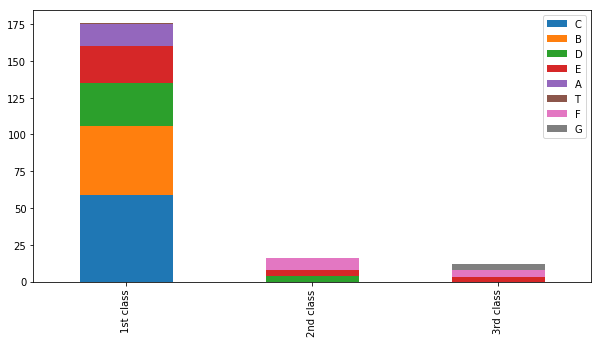

In [49]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

- 1st class : C, B, D, E, A, T  
- 2nd class : D,E,F  
- 3rd class : E,F,G  
- 모든 객실등급에 E가 겹치며, 1st와 2nd는 D, 2nd와 3rd는 F가 겹친다.  
- 모든 가능성을 열어두기위해 겹치는 알파벳으로 null값은 Pclass1은 E 로채워넣고 , Pclass2는 D, Pclass3은 F로 채워넣기로 한다.  

In [50]:
# fill missing Fare with median fare for each Pclass
train.loc[(train['Cabin'].isnull())&(train['Pclass']==1), 'Cabin'] = 'E'
train.loc[(train['Cabin'].isnull())&(train['Pclass']==2), 'Cabin'] = 'D'
train.loc[(train['Cabin'].isnull())&(train['Pclass']==3), 'Cabin'] = 'F'
test.loc[(test['Cabin'].isnull())&(test['Pclass']==1), 'Cabin'] = 'E'
test.loc[(test['Cabin'].isnull())&(test['Pclass']==2), 'Cabin'] = 'D'
test.loc[(test['Cabin'].isnull())&(test['Pclass']==3), 'Cabin'] = 'F'

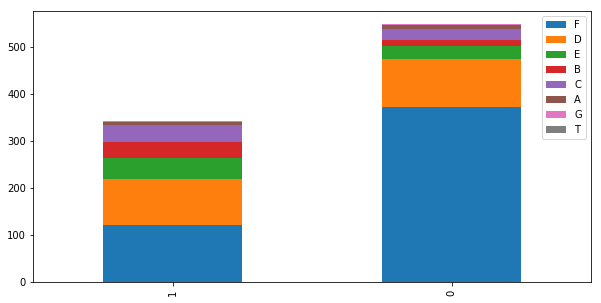

In [51]:
Survived_1 = train[train['Survived']==1]['Cabin'].value_counts()
Survived_0 = train[train['Survived']==0]['Cabin'].value_counts()
df=pd.DataFrame([Survived_1, Survived_0])
df.index = ['1', '0']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [52]:
cabin_mapping = {"B": 0,  "C": 1 , "A": 2, "T": 3, "E": 4, "D": 5, "F": 6, "G": 7}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

- 각 Cabin마다 점수를 할당한다.  
- 1st 이면서 생존비율 높은 순 B = 0, C = 1, A = 2, T = 3  
- 1st와 2nd 겹치면서 생존비율 높은 순E = 4, D = 5  
- 2nd와 3rd가 겹치면서 생존 비율 높은 순 F = 6, G=7  
- 1st class : C, B, D, E, A, T  
- 2nd class : D,E,F  
- 3rd class : E,F,G  

In [53]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,FamilySize,Fare_bin
0,1,0,3,1,1,1,1,0,A/5 21171,0,6,0,"(16.336, 32.252]",5,"(-0.512, 128.082]"
1,2,1,1,5,0,3,1,0,PC 17599,0,1,2,"(32.252, 48.168]",5,"(-0.512, 128.082]"
2,3,1,3,4,0,1,0,0,STON/O2. 3101282,0,6,0,"(16.336, 32.252]",3,"(-0.512, 128.082]"
3,4,1,1,5,0,3,1,0,113803,0,1,0,"(32.252, 48.168]",5,"(-0.512, 128.082]"
4,5,0,3,1,1,3,0,0,373450,0,6,0,"(32.252, 48.168]",3,"(-0.512, 128.082]"
5,6,0,3,1,1,1,0,0,330877,0,6,1,"(16.336, 32.252]",3,"(-0.512, 128.082]"
6,7,0,1,1,1,2,0,0,17463,0,4,0,"(48.168, 64.084]",3,"(-0.512, 128.082]"
7,8,0,3,3,1,4,3,1,349909,0,6,0,"(0.34, 16.336]",2,"(-0.512, 128.082]"
8,9,1,3,5,0,1,0,2,347742,0,6,0,"(16.336, 32.252]",6,"(-0.512, 128.082]"
9,10,1,2,5,0,4,1,0,237736,0,5,2,"(0.34, 16.336]",5,"(-0.512, 128.082]"


In [54]:
features_drop = ['Ticket', 'SibSp', 'Parch', 'Age_bin', 'Fare_bin']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [55]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize
881,882,0,3,1,1,3,0,6,0,3
882,883,0,3,4,0,1,0,6,0,3
883,884,0,2,1,1,1,0,5,0,3
884,885,0,3,1,1,1,0,6,0,3
885,886,0,3,5,0,3,0,6,1,1
886,887,0,2,0,1,1,0,5,0,3
887,888,1,1,4,0,1,0,0,0,3
888,889,0,3,4,0,1,0,6,0,7
889,890,1,1,1,1,1,0,1,2,3
890,891,0,3,1,1,1,0,6,1,3


In [56]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,892,3,1,1,1,0,6,1,3
1,893,3,5,0,2,0,6,0,5
2,894,2,1,1,1,0,5,1,3
3,895,3,1,1,2,0,6,0,3
4,896,3,5,0,2,0,6,0,6
5,897,3,1,1,1,0,6,0,3
6,898,3,4,0,3,0,6,1,3
7,899,2,1,1,0,0,5,0,6
8,900,3,5,0,1,0,6,2,3
9,901,3,1,1,0,0,6,0,6


In [57]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [58]:
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)
train['Fare'] = train['Fare'].astype(int)
test['Fare'] = test['Fare'].astype(int)

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null int64
Sex            891 non-null int32
Age            891 non-null int32
Fare           891 non-null int32
Cabin          891 non-null int64
Embarked       891 non-null int64
FamilySize     891 non-null int64
dtypes: int32(3), int64(7)
memory usage: 59.2 KB


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null int64
Sex            418 non-null int32
Age            418 non-null int32
Fare           418 non-null int32
Cabin          418 non-null int64
Embarked       418 non-null int64
FamilySize     418 non-null int64
dtypes: int32(3), int64(6)
memory usage: 24.6 KB


### 3. Modelling

In [61]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [63]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense
np.random.seed(42)

print('tensorflow version : ', tf.__version__)
print('keras version : ', keras.__version__)

ModuleNotFoundError: No module named 'tensorflow'